# EDA STROKE ICTUS

##### Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset STROKE_DATA donde se recogen datos de pacientes con posibles afectaciones cerebrovasculares, más comunmente conocidas como ictus cerebral.
##### El ejercicio consiste en plotear gráficas interesantes buscando patrones relevantes que pudieran ser útiles en la predicción de posibles pacientes expuestos a sufrir un ictus cerebral

In [1]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats


# Librerías para balanceo de datos
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./stroke_dataset.csv"
#===============================================
# Importamos el dataset
df = pd.read_csv(path_to_data)

#### VARIABLES DECLARADAS
<ul><li><b>gender</b> : género
<li><b>age</b> : edad</li>
<li><b>hypertension</b> : hipertensión</li>
<li><b>heart_disease</b> : enfermo del corazón</li>
<li><b>ever_married</b> : alguna vez casada</li>
<li><b>work_type</b> : funcionaria, autónoma, empresa privada, niños </li>
<li><b>Residence_type</b> : Tipo de residencia, rural o urbano</li>
<li><b>avg_glucose_level</b> : porcentaje de glucosa </li> 
<li><b>bmi</b> : índice de masa corporal.</li>
<li><b>smoking_status</b> : hábito de fumar</li> 
<li><b>stroke</b> : ictus</li>
</ul>    

In [3]:
# VISUALIZAMOS LAS 5 PRIMERAS FILAS
#===============================================
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# VISUALIZAMOS LAS 5 ÚLTIMAS FILAS
#===============================================
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
#Prescindimos de estas 5 columnas, por no considerarlas variables que puedan tener algún impacto en nuestra salida.
# df.drop(["ever_married"], axis=1, inplace=True)
# df.info()

In [6]:
#CONTAMOS FILAS Y COLUMNAS
#===============================================
df.shape

(4981, 11)

##### 4981 FILAS y 11 COLUMNAS

In [7]:
# INFORMACIÓN DEL DATASET 
#===============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## OJO!!! 

In [8]:
# PASAMOS A BOLEANOS LAS SIGUIENTES VARIABLES PARA MEJOR TRATAMIENTO DE LOS DATOS
# =============================================
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)

# OTRA FORMA DE HACERLO QUE DEBERÍA FUNCIONAR TAMBIÉN 
# =============================================
# df[["stroke", "hypertension", "heart_disease"]].astype(bool)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


In [10]:
# PARA VER CANTIDAD DE VALORES DE LA VARIABLE TARGET STROKE EN UNO Y OTRO LADO
df["stroke"].value_counts()

False    4733
True      248
Name: stroke, dtype: int64

##### LA VARIABLE ESTÁ MUY DESEQUILIBRADA

In [11]:
#VISUALIZACIÓN DE NULOS TOTALES EN CADA VARIABLE
#===============================================
df.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### NI UN SOLO VALOR PERDIDO

In [12]:
# ANÁLISIS ESTADÍSTICO BÁSICO
#===============================================
df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [13]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease", "stroke"]
numericas = ["age", "avg_glucose_level", "bmi"]

Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [14]:
df[categoricas].describe()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
count,4981,4981,4981,4981,4981,4981,4981,4981
unique,2,2,4,2,4,2,2,2
top,Female,Yes,Private,Urban,never smoked,False,False,False
freq,2907,3280,2860,2532,1838,4502,4706,4733


In [15]:
#CONTEO DE VALORES EN LAS VARIABLES CATEGÓRICAS
#===============================================
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
Female    2907
Male      2074
Name: gender, dtype: int64

Column name: ever_married
Yes    3280
No     1701
Name: ever_married, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

Column name: hypertension
False    4502
True      479
Name: hypertension, dtype: int64

Column name: heart_disease
False    4706
True      275
Name: heart_disease, dtype: int64

Column name: stroke
False    4733
True      248
Name: stroke, dtype: int64



In [16]:
#DATOS DUPLICADOS 
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

<h2> GRÁFICOS RELEVANTES</h2>
    

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>]], dtype=object)

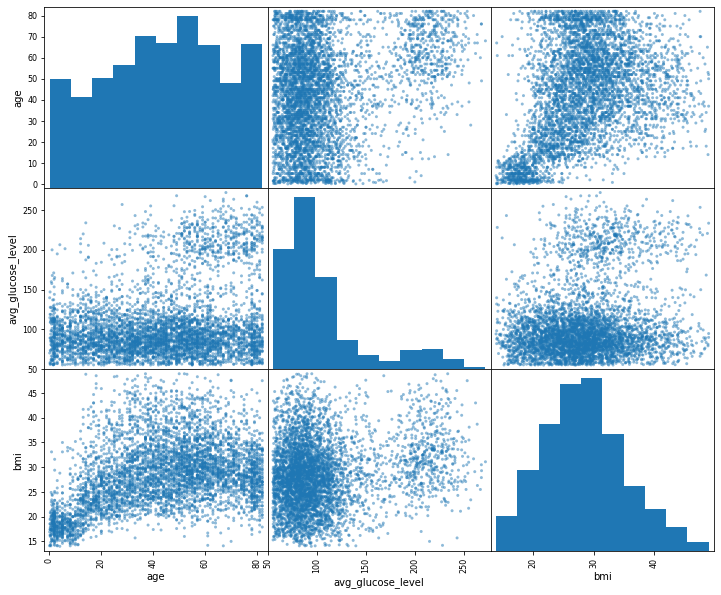

In [17]:
#PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES
#===============================================
pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

In [18]:
 df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

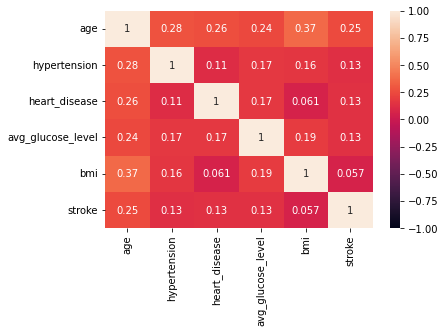

In [19]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
#===============================================
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

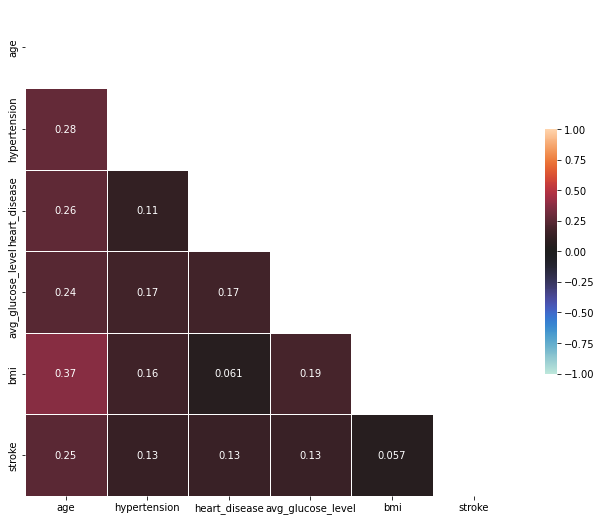

In [20]:
# Ahora igual pero más bonito
#===========================================================================
# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### BAJA CORRELACIÓN ENTRE LAS VARIABLES COMO TAMBIÉN HABÍAMOS APRECIADO EN LA TABLA Y GRÁFICO ANTERIOR.LA CORRELACIÓN MÁS ALTA SERÍA ENTRE bmi y age con un 0.37.

## INGENIERÍA DE CARACTERÍSTICAS

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

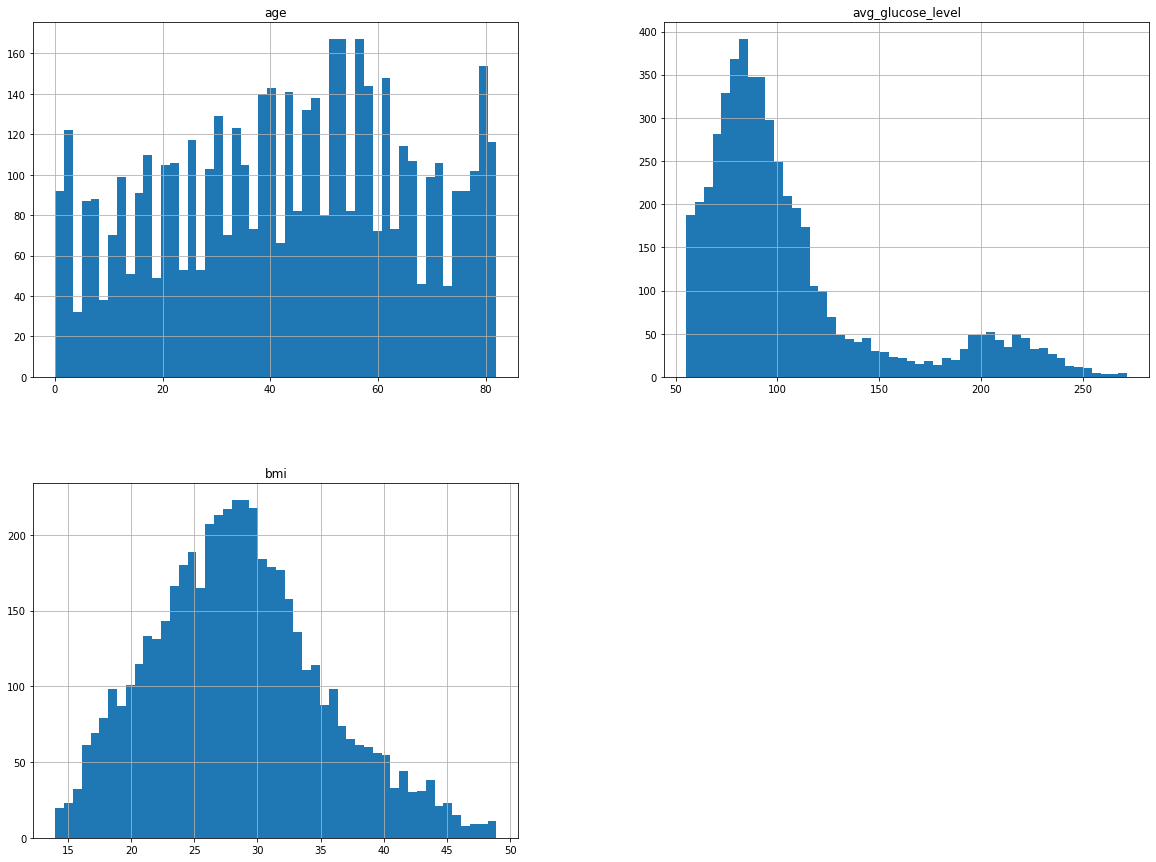

In [21]:
# HISTOGRAMAS DE LAS VARIABLES NUMÉRICAS PARA VER SUS DISTRIBUCIONES
df[numericas].hist(bins=50, figsize=(20,15))

##### LAS VARIABLES AGE, AVG_GLUCOSE_LEVEL Y BMI TIENEN DISTRIBUCIONES NORMALES

<AxesSubplot:xlabel='age', ylabel='Count'>

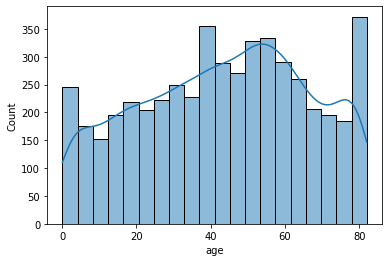

In [22]:
sns.histplot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

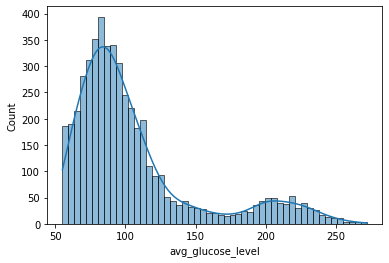

In [23]:
sns.histplot(data=df, x="avg_glucose_level", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

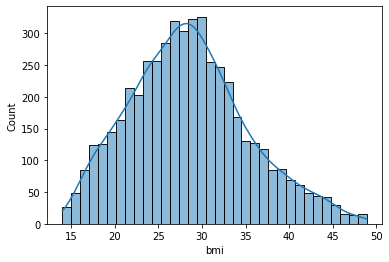

In [24]:
sns.histplot(data=df, x="bmi", kde=True)

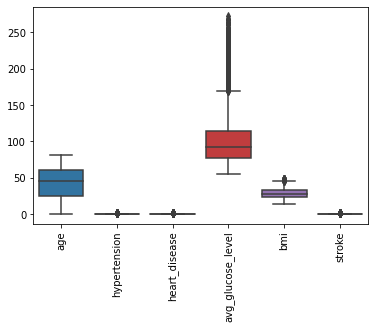

In [25]:
# Observamos los outlers de las variables numéricas
# =======================================================
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='age'>

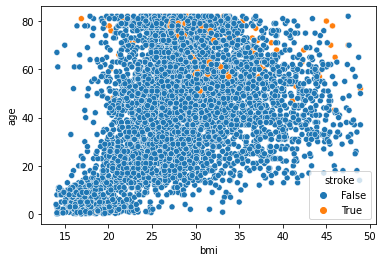

In [26]:
# VISUALIZAMOS LAS VARIABLES bmi, age y stroke
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

##### AUNQUE ESTÁN POR ENCIMA LA MAYORÍA DE PUNTOS AZULES SE VISLUMBRAN LOS POSITIVOS A PARTIR DE 50 AÑOS APROXIMADAMENTE

## OJO!!!! REVISAR ESTA VARIABLE POR SI EL MODELO NO FUESE CORRECTO

<AxesSubplot:xlabel='bmi'>

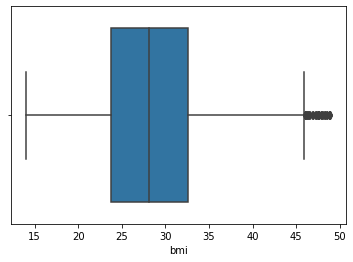

In [27]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
df["bmi"].skew()
sns.boxplot(x=df["bmi"])

In [28]:
#Comprobar cuántos valores perdemos si nos quedamos con menores de 45 en bmi
# ===================================================================
len(df[df["bmi"]>45])

65

In [29]:
# QUITAMOS VALORES MAYORES DE 45
# df=df[(df["bmi"]<45)]

In [30]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
# df["bmi"].skew()
# sns.boxplot(x=df["bmi"])

##### EN PRINCIPIO NO SERÍAN MUCHOS, ESE BMI LO ASOCIARÍAMOS A PERSONAS CON OBESIDAD MÓRBIDA. SON OUTLIERS PERO ESTAMOS PENSANDO QUÉ HACER CON ELLOS. HEMOS PROBADO A QUITARLOS Y PERJUDICA EL MODELO, ASÍ QUE NO LO COMENTAMOS Y NO LO APLICAMOS.

<AxesSubplot:xlabel='age'>

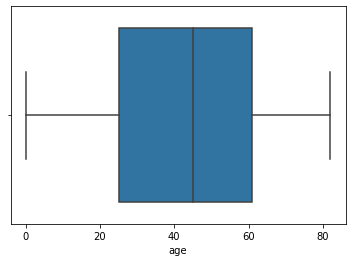

In [31]:
# VISUALIZACIÓN DE LA VARIABLE AGE
# =======================================================
df["age"].skew()
sns.boxplot(x=df["age"])

##### VARIABLE AGE CON MUY BUENA GRÁFICA, SIN OUTLIERS

<AxesSubplot:xlabel='avg_glucose_level'>

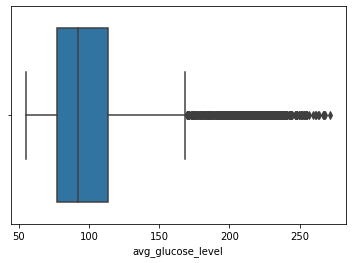

In [32]:
# VISUALIZACIÓN DE LA VARIABLE avg_glucose_level
# =======================================================
df["avg_glucose_level"].skew()
sns.boxplot(x=df["avg_glucose_level"])

##### VARIABLE CON, APARENTEMENTE, MUCHOS OUTLIERS

In [33]:
# Aplicamos logaritmo en base 10 
# log_glucose = np.log(df["avg_glucose_level"])
#Crea columna log_glucose
# df["avg_glucose_level"] = log_glucose
# sns.histplot(x=log_glucose, kde=True)

##### APLICANDO EL LOGARITMO EN BASE 1O MEJORA LA GRÁFICA PERO AÚN ESTÁ DESEQUILIBRADA

## PREPARACIÓN

In [34]:
# SACAMOS LA VARIABLE TARGET STROKE PARA PODER PREDECIRLA
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [35]:
# # RANDOM UNDER SAMPLER:    BALANCEO DE VARIABLES PARA MEJORAR MODELO YA QUE ESTÁN MUY DESCOMPENSADAS
# rus = RandomUnderSampler(sampling_strategy=1) # Float
# # rus = RandomUnderSampler(sampling_strategy= not minority) # String
# X_res, y_res = rus.fit_resample(X,y)

# ax = y_res.value_counts().plot.pie(autopct = '%.2f')
# _ = ax.set_title("Under-sampling")

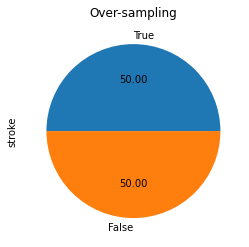

In [36]:
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y) 


ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")

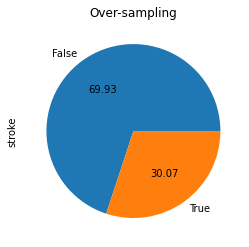

In [37]:
# RANDOM OVER SAMPLER:    BALANCEO DE VARIABLES PARA MEJORAR MODELO YA QUE ESTÁN MUY DESCOMPENSADAS
over_sampler = RandomOverSampler(sampling_strategy=0.43, random_state=None, shrinkage=None)
X_res, y_res = over_sampler.fit_resample(X, y) 


ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")

In [38]:
# X = X_res
# y = y_res

In [39]:
X_res.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,False,True,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,False,True,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,False,False,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,True,False,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,False,False,Yes,Private,Urban,186.21,29.0,formerly smoked


In [40]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             6768 non-null   object 
 1   age                6768 non-null   float64
 2   hypertension       6768 non-null   bool   
 3   heart_disease      6768 non-null   bool   
 4   ever_married       6768 non-null   object 
 5   work_type          6768 non-null   object 
 6   Residence_type     6768 non-null   object 
 7   avg_glucose_level  6768 non-null   float64
 8   bmi                6768 non-null   float64
 9   smoking_status     6768 non-null   object 
dtypes: bool(2), float64(3), object(5)
memory usage: 436.3+ KB


In [41]:
y_res.head()

0    True
1    True
2    True
3    True
4    True
Name: stroke, dtype: bool

In [42]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
numericas = ["age", "avg_glucose_level", "bmi"]

In [43]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [44]:
transformer_numerico_2 = ("transformer_numerico_2", MinMaxScaler(), numericas)
transformer_categorico_2 = ("transformer_categorico_2", OneHotEncoder(), categoricas)

transformer_2 = ColumnTransformer([transformer_numerico_2, transformer_categorico_2], remainder="passthrough")

In [45]:
X_res = transformer.fit_transform(X_res)

In [46]:
X = transformer_2.fit_transform(X)

In [47]:
pd.DataFrame(X_res, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_Female,transformer_categorico__gender_Male,transformer_categorico__ever_married_No,transformer_categorico__ever_married_Yes,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,...,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__hypertension_False,transformer_categorico__hypertension_True,transformer_categorico__heart_disease_False,transformer_categorico__heart_disease_True
0,0.816895,0.801265,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.975586,0.234512,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.597168,0.536008,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.963379,0.549349,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.987793,0.605161,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,0.963379,0.081294,0.412607,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6764,0.743652,0.261703,0.381089,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6765,0.865723,0.649017,0.575931,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6766,0.914551,0.033977,0.404011,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [48]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_Female,transformer_categorico__gender_Male,transformer_categorico__ever_married_No,transformer_categorico__ever_married_Yes,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,...,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__hypertension_False,transformer_categorico__hypertension_True,transformer_categorico__heart_disease_False,transformer_categorico__heart_disease_True
0,0.816895,0.801265,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.975586,0.234512,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.597168,0.536008,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.963379,0.549349,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.987793,0.605161,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.069384,0.452722,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4977,0.487305,0.627966,0.489971,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4978,0.548340,0.184194,0.510029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4979,0.487305,0.133044,0.458453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [49]:
transformer.output_indices_

{'transformer_numerico': slice(0, 3, None),
 'transformer_categorico': slice(3, 21, None),
 'remainder': slice(0, 0, None)}

## Entrenamos

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, random_state = 42)

In [51]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, train_size=0.7, random_state = 42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [54]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    confusion_matrix(y_test,y_predict)
    
    y_pred_train =mod.predict(X_train)
    precision_train = precision_score(y_train,y_pred_train)
    recall_train = recall_score(y_train,y_pred_train)
    f1_score_train = f1_score(y_train,y_pred_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print(confusion_matrix(y_test,y_predict))
        
    
    print(nombre_modelo)
    print()
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1_score: {f1}")
    print(f"accuracy_score: {accuracy}")
    
    print(f"precision_train: {precision_train}")
    print(f"recall_train: {recall_train}")
    print(f"f1_score_train: {f1_score_train}")
    print(f"accuracy_score_train: {accuracy_train}")
    print()

In [55]:
def train_evaluate_2(nombre_modelo_2, modelo_2):
    mod_2 = modelo_2()
    mod_2.fit(X_train_2, y_train_2)
    
    y_predict_2 = mod_2.predict(X_test_2)
    
    precision_2 = precision_score(y_test_2, y_predict_2)
    recall_2 = recall_score(y_test_2, y_predict_2)
    f1_2 = f1_score(y_test_2, y_predict_2)
    accuracy_2 = accuracy_score(y_test_2, y_predict_2)
    confusion_matrix(y_test_2, y_predict_2)
    
    y_pred_train_2 =mod_2.predict(X_train_2)
    precision_train_2 = precision_score(y_train_2,y_pred_train_2)
    recall_train_2 = recall_score(y_train_2,y_pred_train_2)
    f1_score_train_2 = f1_score(y_train_2,y_pred_train_2)
    accuracy_train_2 = accuracy_score(y_train_2,y_pred_train_2)
    print(confusion_matrix(y_test_2,y_predict_2))
        
    
    print(nombre_modelo_2)
    print()
    print(f"precision_2: {precision_2}")
    print(f"recall_2: {recall_2}")
    print(f"f1_score_2: {f1_2}")
    print(f"accuracy_score_2: {accuracy_2}")
    print(f"precision_train_2: {precision_train_2}")
    print(f"recall_train_2: {recall_train_2}")
    print(f"f1_score_train_2: {f1_score_train_2}")
    print(f"accuracy_score_train_2: {accuracy_train_2}")
    print()

In [56]:
train_evaluate("Decission Tree", DecisionTreeClassifier)

[[1340   83]
 [   2  606]]
Decission Tree

precision: 0.8795355587808418
recall: 0.9967105263157895
f1_score: 0.9344641480339245
accuracy_score: 0.9581486952240276
precision_train: 1.0
recall_train: 1.0
f1_score_train: 1.0
accuracy_score_train: 1.0



In [57]:
train_evaluate_2("Decission Tree", DecisionTreeClassifier)

[[1346   71]
 [  66   12]]
Decission Tree

precision_2: 0.14457831325301204
recall_2: 0.15384615384615385
f1_score_2: 0.14906832298136644
accuracy_score_2: 0.9083612040133779
precision_train_2: 1.0
recall_train_2: 1.0
f1_score_train_2: 1.0
accuracy_score_train_2: 1.0



Matriz de confusion


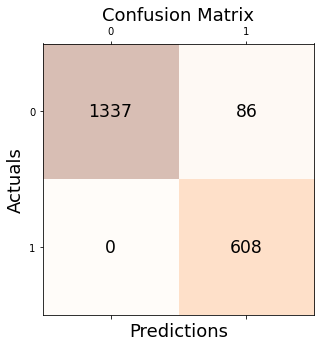

METRICAS
Precision: 0.876
Recall: 1.000
Accuracy: 0.958
F1 Score: 0.934
METRICAS TRAIN:
Precision_train: 1.000
Recall_train: 1.000
Accuracy_train: 1.000
F1 Score_train: 1.000


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix


knn = KNeighborsRegressor(n_neighbors = 7)
# Fit the classifier to the data
knn.fit(X_train,y_train)

def tree_clasiffier():
    modelo = DecisionTreeClassifier(
            # CAMBIAMOS PARÁMETROS ACONSEJADOS POR EL RAMDON GRID, Y SE CONVIERTEN EN HIPERPARÁMETROS
            max_depth         = 50,
            criterion         = 'entropy',
            random_state      = 123
          )
    # Entrenamiento del modelo
    modelo.fit(X_train, y_train)
    # Estructura del árbol creado
    # ------------------------------------------------------------------------------

    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Matriz de confusion")
    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    y_pred_train = modelo.predict(X_train)

    print("METRICAS")
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))

    print("METRICAS TRAIN:")
    print('Precision_train: %.3f' % precision_score(y_train, y_pred_train))
    print('Recall_train: %.3f' % recall_score(y_train, y_pred_train))
    print('Accuracy_train: %.3f' % accuracy_score(y_train, y_pred_train))
    print('F1 Score_train: %.3f' % f1_score(y_train, y_pred_train))

tree_clasiffier()

In [69]:
from sklearn.metrics import classification_report
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [86]:
# catboost for classification
# evaluate the model

def CatBoostClassifier():
    model = CatBoostClassifier(verbose=False, n_estimators=100)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X_train_2, y_train_2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Matriz de confusion")
    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    y_pred_train = model.predict(X_train_2)

    print("METRICAS")
    print('Precision: %.3f' % precision_score(y_train, X_train))
    print('Recall: %.3f' % recall_score(y_train, X_train))
    print('Accuracy: %.3f' % accuracy_score(y_train, X_train))
    print('F1 Score: %.3f' % f1_score(y_train, X_train))

    print("METRICAS TRAIN:")
    print('Precision_train: %.3f' % precision_score(y_train_2, y_pred_train))
    print('Recall_train: %.3f' % recall_score(y_train_2, y_pred_train))
    print('Accuracy_train: %.3f' % accuracy_score(y_train_2, y_pred_train))
    print('F1 Score_train: %.3f' % f1_score(y_train_2, y_pred_train))
    print(classification_report(y_test,y_pred))
    
CatBoostClassifier()

TypeError: CatBoostClassifier() got an unexpected keyword argument 'verbose'

## CROSS VALIDATION CON RANDOM SEARCH

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
model = DecisionTreeClassifier()

# param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [ ]:
randm = RandomizedSearchCV(estimator=model, param_distributions = tree_param,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_) 
#de este best params sacamos los hiperparámetros que ponemos en la parte del modelo, en este caso del def tree_clasiffier():


 Results from Random Search 
The best estimator across ALL searched params: DecisionTreeClassifier(criterion='entropy', max_depth=70)
The best score across ALL searched params: 0.914079969453413
The best parameters across ALL searched params: {'max_depth': 70, 'criterion': 'entropy'}
